In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from bokeh.plotting import figure, show, output_notebook
from bokeh.io import push_notebook

# Enable Bokeh output
output_notebook()


Loading BokehJS ...

In [4]:
# Load COVID-19 dataset from Our World in Data
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

In [6]:
# Show basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [7]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [14]:
# Drop missing values in important columns
df = df.dropna(subset=['location', 'date'])

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter selected countries
countries = ['India', 'United States', 'Brazil', 'United Kingdom', 'Indonesia']
df = df[df['location'].isin(countries)]

# Select key columns
df = df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths']]

# Fill NaN values with 0
df.fillna(0, inplace=True)

# Preview cleaned data
df.head()


,location,date,total_cases,new_cases,total_deaths,new_deaths
50234,Brazil,2020-01-05,0.0,0.0,0.0,0.0
50235,Brazil,2020-01-06,0.0,0.0,0.0,0.0
50236,Brazil,2020-01-07,0.0,0.0,0.0,0.0
50237,Brazil,2020-01-08,0.0,0.0,0.0,0.0
50238,Brazil,2020-01-09,0.0,0.0,0.0,0.0


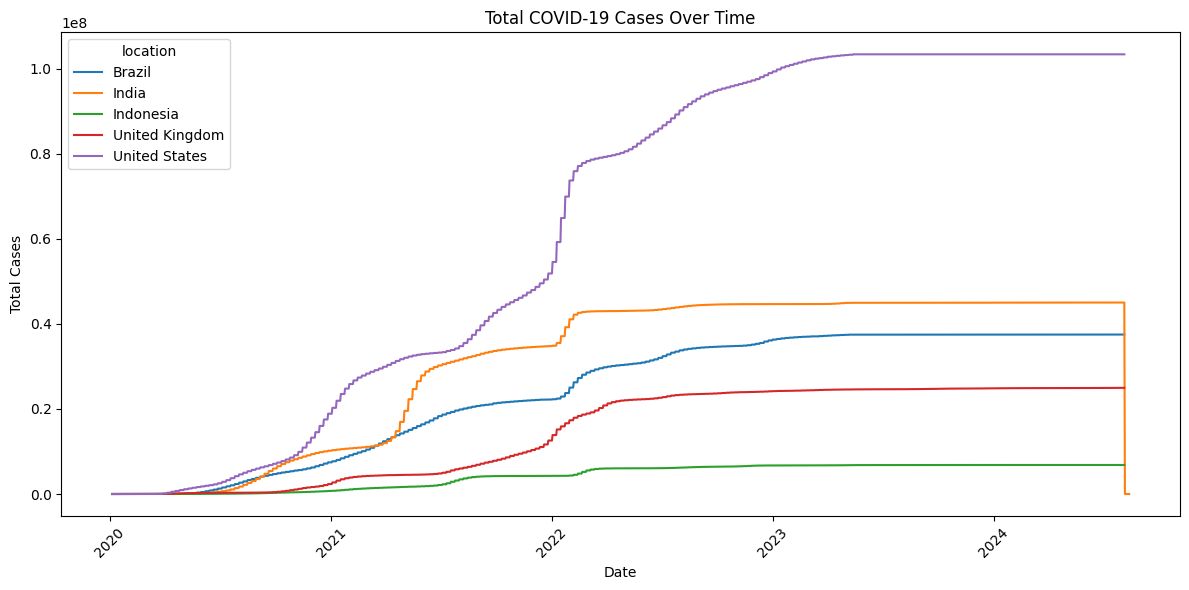

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='total_cases', hue='location')
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
fig = px.line(df, x="date", y="total_cases", color="location",
              title="Interactive: Total COVID-19 Cases Over Time")
fig.show()


In [11]:
# Data for India
india_data = df[df['location'] == 'India']

# Create interactive plot
p = figure(title="India: New Daily COVID-19 Cases",
           x_axis_type="datetime", width=800, height=400)
p.line(india_data['date'], india_data['new_cases'], color='navy', alpha=0.6)
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'New Cases'

show(p)


**Key Insights**
- All five countries had clear waves of COVID-19 from 2020 to 2022.

- India had a huge spike in mid-2021, especially visible in daily new cases.

- The US and Brazil had high total case counts throughout the timeline.

- The UK showed sharp surges, likely from new variants.

- Indonesia had a slower start but saw a major wave in 2021.

- Interactive charts (Plotly, Bokeh) made it easier to explore trends.

- Data was cleaned and filtered for accuracy across selected countries.